In [1]:
#Problem Statement
# To predict the probability of Employee will leave company and whe he/she is leaving.
#datatype 
#sort
#RF 

"""Introduction-- 
In order to start with exercise,I have used HR Analytics Employee Attrition & Performance Dataset,
which was downloaded from Kaggle. . This is a fictional data set created by data scientists.
"""

'''The key to success in any organization is attracting and retaining top talent. 
I’m an HR analyst at my company, and one of my tasks is to determine which factors keep employees at my company and
which prompt others to leave. I need to know what factors I can change to prevent the loss of good people. 
Watson Analytics is going to help.'''

'''I have data about past and current employees in a spreadsheet on my desk top. 
It has various data points on our employees, but I’m most interested in whether they’re 
still with my company or whether they’ve gone to work somewhere else. 
And I want to understand how this relates to workforce/EMPLOYEE attrition.

The dataset includes features like Age, Employee Role, Daily Rate,

data type int and object - ordinal data 
Job Satisfaction, Years At Company, Years In Current Role etc.
Education
1 'Below College' 2 'College' 3 'Bachelor' 4 'Master' 5 'Doctor'
EnvironmentSatisfaction
1 'Low' 2 'Medium' 3 'High' 4 'Very High'
JobInvolvement
1 'Low' 2 'Medium' 3 'High' 4 'Very High'
JobSatisfaction
1 'Low' 2 'Medium' 3 'High' 4 'Very High'
PerformanceRating
1 'Low' 2 'Good' 3 'Excellent' 4 'Outstanding'
RelationshipSatisfaction
1 'Low' 2 'Medium' 3 'High' 4 'Very High'
WorkLifeBalance
1 'Bad' 2 'Good' 3 'Better' 4 'Best'''
'''Summary of our Data
Before we get into the deep visualizations, we want to make sure how our data looks like right? 
This will

    better help us have a better grasp as to how we should work with our data later throughout the project.

Questions we could Ask Ourselves:
Columns and Observations: How many columns and observations is there in our dataset?
--Missing data: Are there any missing data in our dataset?
--Data Type: The different datatypes we are dealing in this dataset.
--Distribution of our Data: Is it right-skewed, left-skewed or symmetric? 
This might be useful especially if we are implementing any type of statistical analysis or even for modelling.
--Structure of our Data: Some datasets are a bit complex to work with however, the tidyverse package is really useful
to deal with complex datasets.
--Meaning of our Data: What does our data mean? Most features in this dataset are ordinal variables 
which are similar to categorical variables however, ordering of those variables matter. A lot of the variables in 
this dataset have a range from 1-4 or 1-5, The lower the ordinal variable, the worse it is in this case.
For instance, Job Satisfaction 1 = "Low" while 4 = "Very High".
--Label: What is our label in the dataset or in otherwords the output?

Summary:
Dataset Structure: 1470 observations (rows), 35 features (variables)
Missing Data: Luckily for us, there is no missing data! this will make it easier to work with the dataset.
Data Type: We only have two datatypes in this dataset: factors and integers
Label" Attrition is the label in our dataset and we would like to find out why employees are leaving the organization!
Imbalanced dataset: 1237 (84% of cases) employees did not leave the organization
while 237 (16% of cases) did leave the organization making our dataset to be considered imbalanced
since more people stay in the organization than they actually leave.'''
#Which factors led to employee attrition?
#Attrition in business describes a gradual but deliberate reduction in staff numbers that occurs as employees 
#retire or resign and are not replaced
#Turnover rate refers to the percentage of employees leaving a company within a certain period of time
import pandas as pd       # importing dataframes and series
import numpy as np        # calculation purpose
import os
import matplotlib.pyplot as plt    #data visualtisation
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline

#.loc[] is primarily label based
#.iloc[] is primarily integer position based (from 0 to length-1 of the axis)

In [2]:
hr.info()   # INT , OBJECT(Ordinal)
# Print a concise summary of a DataFrame,to his method prints information about a DataFrame including
              #the index dtype and column dtypes, non-null values and memory usage.

NameError: name 'hr' is not defined

In [ ]:
hr.info()   # INT , OBJECT(Ordinal)
# Print a concise summary of a DataFrame,to his method prints information about a DataFrame including
              #the index dtype and column dtypes, non-null values and memory usage.

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import os
import statsmodels.api as sm
%matplotlib inline

In [198]:
HR_Attrition = pd.read_excel('C:\\Users\\Dr. Fix it\\Desktop\\Python codes\\Data\\HR Attrition.xlsx')

In [4]:
HR_Attrition.head(2)

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,Yes,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,No,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7


In [5]:
HR_Attrition.Attrition.replace(('Yes', 'No'), (1, 0), inplace=True)

In [6]:
HR_Attrition.shape

(1470, 35)

# 1 Univariate Analysis

In [7]:
HR_Attrition.Age.describe()

count    1470.000000
mean       36.923810
std         9.135373
min        18.000000
25%        30.000000
50%        36.000000
75%        43.000000
max        60.000000
Name: Age, dtype: float64

In [8]:
HR_Attrition.Attrition.value_counts() 

0    1233
1     237
Name: Attrition, dtype: int64

In [9]:
HR_Attrition.Attrition.value_counts(normalize=True) 

0    0.838776
1    0.161224
Name: Attrition, dtype: float64

In [10]:
HR_Attrition.BusinessTravel.value_counts(normalize=True)

Travel_Rarely        0.709524
Travel_Frequently    0.188435
Non-Travel           0.102041
Name: BusinessTravel, dtype: float64

In [11]:
HR_Attrition.Department.value_counts(normalize=True)

Research & Development    0.653741
Sales                     0.303401
Human Resources           0.042857
Name: Department, dtype: float64

In [12]:
HR_Attrition.Education.value_counts(normalize=True)

3    0.389116
4    0.270748
2    0.191837
1    0.115646
5    0.032653
Name: Education, dtype: float64

In [13]:
HR_Attrition.EducationField.value_counts(normalize=True)

Life Sciences       0.412245
Medical             0.315646
Marketing           0.108163
Technical Degree    0.089796
Other               0.055782
Human Resources     0.018367
Name: EducationField, dtype: float64

In [14]:
HR_Attrition.EducationField.value_counts(normalize=True)

Life Sciences       0.412245
Medical             0.315646
Marketing           0.108163
Technical Degree    0.089796
Other               0.055782
Human Resources     0.018367
Name: EducationField, dtype: float64

In [15]:
HR_Attrition.EnvironmentSatisfaction.value_counts(normalize=True)


3    0.308163
4    0.303401
2    0.195238
1    0.193197
Name: EnvironmentSatisfaction, dtype: float64

In [16]:
HR_Attrition.Gender.value_counts(normalize=True)

Male      0.6
Female    0.4
Name: Gender, dtype: float64

In [17]:
HR_Attrition.JobInvolvement.value_counts(normalize=True)

3    0.590476
2    0.255102
4    0.097959
1    0.056463
Name: JobInvolvement, dtype: float64

In [18]:
HR_Attrition.JobLevel.value_counts(normalize=True)

1    0.369388
2    0.363265
3    0.148299
4    0.072109
5    0.046939
Name: JobLevel, dtype: float64

In [19]:
HR_Attrition.JobRole.value_counts(normalize=True)

Sales Executive              0.221769
Research Scientist           0.198639
Laboratory Technician        0.176190
Manufacturing Director       0.098639
Healthcare Representative    0.089116
Manager                      0.069388
Sales Representative         0.056463
Research Director            0.054422
Human Resources              0.035374
Name: JobRole, dtype: float64

In [20]:
HR_Attrition.JobSatisfaction.value_counts(normalize=True)

4    0.312245
3    0.300680
1    0.196599
2    0.190476
Name: JobSatisfaction, dtype: float64

In [21]:
HR_Attrition.MaritalStatus.value_counts(normalize=True)

Married     0.457823
Single      0.319728
Divorced    0.222449
Name: MaritalStatus, dtype: float64

In [22]:
HR_Attrition.NumCompaniesWorked.value_counts(normalize=True)

1    0.354422
0    0.134014
3    0.108163
2    0.099320
4    0.094558
7    0.050340
6    0.047619
5    0.042857
9    0.035374
8    0.033333
Name: NumCompaniesWorked, dtype: float64

In [23]:
HR_Attrition.OverTime.value_counts(normalize=True)

No     0.717007
Yes    0.282993
Name: OverTime, dtype: float64

In [24]:
HR_Attrition.PerformanceRating.value_counts(normalize=True)

3    0.846259
4    0.153741
Name: PerformanceRating, dtype: float64

In [25]:
HR_Attrition.RelationshipSatisfaction.value_counts(normalize=True)

3    0.312245
4    0.293878
2    0.206122
1    0.187755
Name: RelationshipSatisfaction, dtype: float64

In [26]:
HR_Attrition.TrainingTimesLastYear.value_counts(normalize=True)

2    0.372109
3    0.334014
4    0.083673
5    0.080952
1    0.048299
6    0.044218
0    0.036735
Name: TrainingTimesLastYear, dtype: float64

In [27]:
HR_Attrition.WorkLifeBalance.value_counts(normalize=True)

3    0.607483
2    0.234014
4    0.104082
1    0.054422
Name: WorkLifeBalance, dtype: float64

In [28]:
HR_Attrition.YearsInCurrentRole.describe()

count    1470.000000
mean        4.229252
std         3.623137
min         0.000000
25%         2.000000
50%         3.000000
75%         7.000000
max        18.000000
Name: YearsInCurrentRole, dtype: float64

In [29]:
HR_Attrition.YearsSinceLastPromotion.describe()

count    1470.000000
mean        2.187755
std         3.222430
min         0.000000
25%         0.000000
50%         1.000000
75%         3.000000
max        15.000000
Name: YearsSinceLastPromotion, dtype: float64

In [30]:
HR_Attrition.YearsWithCurrManager.describe()

count    1470.000000
mean        4.123129
std         3.568136
min         0.000000
25%         2.000000
50%         3.000000
75%         7.000000
max        17.000000
Name: YearsWithCurrManager, dtype: float64

# 2 Missing Value Analysis

In [31]:
HR_Attrition.isnull().sum()

Attrition                   0
Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

# 3 Bivariate Analysis

# Attrition VS Age

In [32]:
import scipy.stats as stats
from scipy.stats import ttest_ind

In [33]:
HR_Attrition.groupby(['Attrition']).agg({'Age': 'mean'})

,Age
Attrition,
0,37.561233
1,33.607595


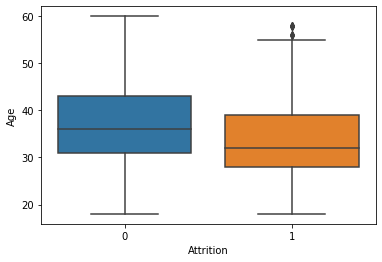

In [34]:
sns.boxplot(x="Attrition", y="Age", data=HR_Attrition)

In [35]:
cat1 = HR_Attrition[HR_Attrition['Attrition']==0]
cat2 = HR_Attrition[HR_Attrition['Attrition']==1]

ttest_ind(cat1['Age'], cat2['Age'])
#There is significant association between age and Attrition

Ttest_indResult(statistic=6.1786638353072165, pvalue=8.356308021103649e-10)

# Attrition VS BusinessTravel

In [36]:
x1=pd.crosstab(HR_Attrition["Attrition"],HR_Attrition["BusinessTravel"])
print(x1)


BusinessTravel  Non-Travel  Travel_Frequently  Travel_Rarely
Attrition                                                   
0                      138                208            887
1                       12                 69            156


In [37]:
stats.chi2_contingency(x1) 
#There is significant association between Business Travel and Attrition

(24.182413685655174,
 5.608614476449931e-06,
 2,
 array([[125.81632653, 232.34081633, 874.84285714],
        [ 24.18367347,  44.65918367, 168.15714286]]))

# Attrition VS DailyRate

In [38]:
ttest_ind(cat1['DailyRate'], cat2['DailyRate'])
#There is significant association between DailyRate and Attrition

Ttest_indResult(statistic=2.1740836777017747, pvalue=0.02985816066026497)

# Attrition VS Department

In [39]:
x2=pd.crosstab(HR_Attrition["Attrition"],HR_Attrition["Department"])
print(x2)


Department  Human Resources  Research & Development  Sales
Attrition                                                 
0                        51                     828    354
1                        12                     133     92


In [40]:
stats.chi2_contingency(x2) 
#There is significant association between Department and Attrition

(10.79600732241067,
 0.004525606574479633,
 2,
 array([[ 52.84285714, 806.06326531, 374.09387755],
        [ 10.15714286, 154.93673469,  71.90612245]]))

# Attrition VS DistanceFromHome


In [41]:
ttest_ind(cat1['DistanceFromHome'], cat2['DistanceFromHome'])
#There is significant association between DistanceFromHome and Attrition

Ttest_indResult(statistic=-2.994708098265125, pvalue=0.0027930600802134266)

# Attrition VS Education

In [42]:
ttest_ind(cat1['Education'], cat2['Education'])
#There is no significant association between Education and Attrition

Ttest_indResult(statistic=1.202625515508589, pvalue=0.2293152033223043)

# Attrition VS EducationField


In [43]:
x3=pd.crosstab(HR_Attrition["Attrition"],HR_Attrition["EducationField"])
print(x3)

EducationField  Human Resources  Life Sciences  Marketing  Medical  Other  \
Attrition                                                                   
0                            20            517        124      401     71   
1                             7             89         35       63     11   

EducationField  Technical Degree  
Attrition                         
0                            100  
1                             32  


In [44]:
stats.chi2_contingency(x3) 
#There is significant association between EducationField and Attrition

(16.024674119585423,
 0.006773980139025222,
 5,
 array([[ 22.64693878, 508.29795918, 133.36530612, 389.19183673,
          68.77959184, 110.71836735],
        [  4.35306122,  97.70204082,  25.63469388,  74.80816327,
          13.22040816,  21.28163265]]))

# Attrition VS EmployeeNumber

In [45]:
ttest_ind(cat1['EmployeeNumber'], cat2['EmployeeNumber'])
#There is no significant association between EmployeeNumber and Attrition

Ttest_indResult(statistic=0.4052843139019291, pvalue=0.6853275897297122)

# Attrition VS EnvironmentSatisfaction

In [46]:
x4=pd.crosstab(HR_Attrition["Attrition"],HR_Attrition["EnvironmentSatisfaction"])
print(x4)

EnvironmentSatisfaction    1    2    3    4
Attrition                                  
0                        212  244  391  386
1                         72   43   62   60


In [47]:
stats.chi2_contingency(x4)
#There is significant association between EnvironmentSatisfaction and Attrition

(22.503881435842295,
 5.1234689062894205e-05,
 3,
 array([[238.2122449 , 240.72857143, 379.96530612, 374.09387755],
        [ 45.7877551 ,  46.27142857,  73.03469388,  71.90612245]]))

# Attrition VS Gender

In [48]:
x5=pd.crosstab(HR_Attrition["Attrition"],HR_Attrition["Gender"])
print(x5)

Gender     Female  Male
Attrition              
0             501   732
1              87   150


In [49]:
stats.chi2_contingency(x5)
#There is no significant association between Gender and Attrition

(1.1169671241970975, 0.29057244902890855, 1, array([[493.2, 739.8],
        [ 94.8, 142.2]]))

# Attrition VS HourlyRate

In [50]:
ttest_ind(cat1['HourlyRate'], cat2['HourlyRate'])
#There is no significant association between HourlyRate and Attrition

Ttest_indResult(statistic=0.26228987349264493, pvalue=0.7931347689944243)

# Attrition VS JobInvolvement

In [51]:
x6=pd.crosstab(HR_Attrition["Attrition"],HR_Attrition["JobInvolvement"])
print(x6)

JobInvolvement   1    2    3    4
Attrition                        
0               55  304  743  131
1               28   71  125   13


In [52]:
stats.chi2_contingency(x6)
#There is significant association between Jobinvolvement and Attrition

(28.492021234659283,
 2.8631806367134195e-06,
 3,
 array([[ 69.61836735, 314.54081633, 728.05714286, 120.78367347],
        [ 13.38163265,  60.45918367, 139.94285714,  23.21632653]]))

# Attrition VS JobLevel

In [53]:
x7=pd.crosstab(HR_Attrition["Attrition"],HR_Attrition["JobLevel"])
print(x7)

JobLevel     1    2    3    4   5
Attrition                        
0          400  482  186  101  64
1          143   52   32    5   5


In [54]:
stats.chi2_contingency(x7)
#There is significant association between JobLevel and Attrition

(72.52901310667391,
 6.634684715458909e-15,
 4,
 array([[455.45510204, 447.90612245, 182.85306122,  88.91020408,
          57.8755102 ],
        [ 87.54489796,  86.09387755,  35.14693878,  17.08979592,
          11.1244898 ]]))

# Attrition VS JobRole

In [55]:
x8=pd.crosstab(HR_Attrition["Attrition"],HR_Attrition["JobRole"])
print(x8)

JobRole    Healthcare Representative  Human Resources  Laboratory Technician  \
Attrition                                                                      
0                                122               40                    197   
1                                  9               12                     62   

JobRole    Manager  Manufacturing Director  Research Director  \
Attrition                                                       
0               97                     135                 78   
1                5                      10                  2   

JobRole    Research Scientist  Sales Executive  Sales Representative  
Attrition                                                             
0                         245              269                    50  
1                          47               57                    33  


In [56]:
stats.chi2_contingency(x8)
#There is significant association between Jobrole and Attrition

(86.19025367670434,
 2.752481638050657e-15,
 8,
 array([[109.87959184,  43.61632653, 217.24285714,  85.55510204,
         121.62244898,  67.10204082, 244.92244898, 273.44081633,
          69.61836735],
        [ 21.12040816,   8.38367347,  41.75714286,  16.44489796,
          23.37755102,  12.89795918,  47.07755102,  52.55918367,
          13.38163265]]))

# Attrition VS JobSatisfaction

In [57]:
x9=pd.crosstab(HR_Attrition["Attrition"],HR_Attrition["JobSatisfaction"])
print(x9)

JobSatisfaction    1    2    3    4
Attrition                          
0                223  234  369  407
1                 66   46   73   52


In [58]:
stats.chi2_contingency(x9)
#There is significant association between JobSatisfaction and Attrition

(17.505077010348,
 0.0005563004510387556,
 3,
 array([[242.40612245, 234.85714286, 370.73877551, 384.99795918],
        [ 46.59387755,  45.14285714,  71.26122449,  74.00204082]]))

# Attrition VS MaritalStatus

In [59]:
x9=pd.crosstab(HR_Attrition["Attrition"],HR_Attrition["MaritalStatus"])
print(x9)

MaritalStatus  Divorced  Married  Single
Attrition                               
0                   294      589     350
1                    33       84     120


In [60]:
stats.chi2_contingency(x9)
#There is significant association between MaritalStatus and Attrition

(46.163676540848705,
 9.45551106034083e-11,
 2,
 array([[274.27959184, 564.49591837, 394.2244898 ],
        [ 52.72040816, 108.50408163,  75.7755102 ]]))

# Attrition VS MonthlyIncome

In [61]:
ttest_ind(cat1['MonthlyIncome'], cat2['MonthlyIncome'])
#There is significant association between Monthlyincome and Attrition

Ttest_indResult(statistic=6.203935765608938, pvalue=7.14736398535381e-10)

# Attrition VS MonthlyRate

In [62]:
ttest_ind(cat1['MonthlyRate'], cat2['MonthlyRate'])
#There is no significant association between MonthlyRate and Attrition

Ttest_indResult(statistic=-0.5813058211545318, pvalue=0.5611235982243015)

# Attrition VS NumCompaniesWorked

In [63]:
ttest_ind(cat1['NumCompaniesWorked'], cat2['NumCompaniesWorked'])
#There is no significant association between NumCompaniesWorked and Attrition

Ttest_indResult(statistic=-1.6680187953544354, pvalue=0.0955252620565195)

# Attrition VS Over18

In [64]:
x10=pd.crosstab(HR_Attrition["Attrition"],HR_Attrition["Over18"])
print(x10)

Over18        Y
Attrition      
0          1233
1           237


In [65]:
stats.chi2_contingency(x10)
#There is no significant association between Over18 and Attrition

(0.0, 1.0, 0, array([[1233.],
        [ 237.]]))

# Attrition VS OverTime

In [66]:
x11=pd.crosstab(HR_Attrition["Attrition"],HR_Attrition["OverTime"])
print(x11)

OverTime    No  Yes
Attrition          
0          944  289
1          110  127


In [67]:
stats.chi2_contingency(x11)
#There is significant association between OverTime and Attrition

(87.56429365828768,
 8.15842372153832e-21,
 1,
 array([[884.06938776, 348.93061224],
        [169.93061224,  67.06938776]]))

# Attrition VS PercentSalaryHike

In [68]:
ttest_ind(cat1['PercentSalaryHike'], cat2['PercentSalaryHike'])
#There is no significant association between PercentSalaryHike and Attrition

Ttest_indResult(statistic=0.5164573250747643, pvalue=0.6056128238893757)

# Attrition VS PerformanceRating

In [69]:
x11=pd.crosstab(HR_Attrition["Attrition"],HR_Attrition["PerformanceRating"])
print(x11)

PerformanceRating     3    4
Attrition                   
0                  1044  189
1                   200   37


In [70]:
stats.chi2_contingency(x11)
#There is no significant association between PerformanceRating and Attrition

(0.00015475439428271534,
 0.9900745465934576,
 1,
 array([[1043.43673469,  189.56326531],
        [ 200.56326531,   36.43673469]]))

# Attrition VS RelationshipSatisfaction

In [71]:
x12=pd.crosstab(HR_Attrition["Attrition"],HR_Attrition["RelationshipSatisfaction"])
print(x12)

RelationshipSatisfaction    1    2    3    4
Attrition                                   
0                         219  258  388  368
1                          57   45   71   64


In [72]:
stats.chi2_contingency(x12)
#There is no significant association between RelationshipSatisfaction and Attrition

(5.241067859713708,
 0.15497244371052626,
 3,
 array([[231.50204082, 254.14897959, 384.99795918, 362.35102041],
        [ 44.49795918,  48.85102041,  74.00204082,  69.64897959]]))

# Attrition VS StandardHours

In [73]:
ttest_ind(cat1['StandardHours'], cat2['StandardHours'])
#There is no significant association between StandardHours and Attrition

C:\Python\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Python\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Python\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


Ttest_indResult(statistic=nan, pvalue=nan)

# Attrition VS StockOptionLevel

In [74]:
x14=pd.crosstab(HR_Attrition["Attrition"],HR_Attrition["StockOptionLevel"])
print(x14)

StockOptionLevel    0    1    2   3
Attrition                          
0                 477  540  146  70
1                 154   56   12  15


In [75]:
stats.chi2_contingency(x14)
#There is significant association between StockOptionLevel and Attrition

(60.59830108612225,
 4.379390336108354e-13,
 3,
 array([[529.26734694, 499.91020408, 132.52653061,  71.29591837],
        [101.73265306,  96.08979592,  25.47346939,  13.70408163]]))

# Attrition VS TotalWorkingYears

In [76]:
ttest_ind(cat1['TotalWorkingYears'], cat2['TotalWorkingYears'])
#There is significant association between TotalWorkingYears and Attrition

Ttest_indResult(statistic=6.6522546135024445, pvalue=4.0618781112668525e-11)

# Attrition VS TrainingTimesLastYear

In [77]:
ttest_ind(cat1['TrainingTimesLastYear'], cat2['TrainingTimesLastYear'])
#There is significant association between TrainingTimesLastYear and Attrition

Ttest_indResult(statistic=2.2829029923666897, pvalue=0.02257849973720126)

# Attrition VS WorkLifeBalance

In [78]:
x15=pd.crosstab(HR_Attrition["Attrition"],HR_Attrition["WorkLifeBalance"])
print(x15)

WorkLifeBalance   1    2    3    4
Attrition                         
0                55  286  766  126
1                25   58  127   27


In [79]:
stats.chi2_contingency(x15)
#There is significant association between WorkLifeBalance and Attrition

(16.3250970916474,
 0.0009725698845348824,
 3,
 array([[ 67.10204082, 288.53877551, 749.02653061, 128.33265306],
        [ 12.89795918,  55.46122449, 143.97346939,  24.66734694]]))

# Attrition VS YearsAtCompany

In [80]:
ttest_ind(cat1['YearsAtCompany'], cat2['YearsAtCompany'])
#There is significant association between YearsAtCompany and Attrition

Ttest_indResult(statistic=5.1963086670254235, pvalue=2.3188716103863033e-07)

# Attrition VS YearsInCurrentRole

In [81]:
ttest_ind(cat1['YearsInCurrentRole'], cat2['YearsInCurrentRole'])
#There is significant association between YearsInCurrentRole and Attrition

Ttest_indResult(statistic=6.232038413295282, pvalue=6.003185843641377e-10)

# Attrition VS YearsSinceLastPromotion

In [82]:
ttest_ind(cat1['YearsSinceLastPromotion'], cat2['YearsSinceLastPromotion'])
#There is no significant association between YearsSinceLastPromotion and Attrition

Ttest_indResult(statistic=1.2657876620135298, pvalue=0.2057899591624936)

# Attrition VS YearsWithCurrManager

In [83]:
ttest_ind(cat1['YearsWithCurrManager'], cat2['YearsWithCurrManager'])
#There is significant association between YearsWithCurrManager and Attrition

Ttest_indResult(statistic=6.059068531868998, pvalue=1.7369867845242207e-09)

# Attrition VS YearsInCurrentRole

In [84]:
ttest_ind(cat1['YearsInCurrentRole'], cat2['YearsInCurrentRole'])
#There is significant association between YearsWithCurrManager and Attrition

Ttest_indResult(statistic=6.232038413295282, pvalue=6.003185843641377e-10)


# Model Building

#Splitting depedent and independent variable and Creating dummies

In [85]:
y=HR_Attrition.iloc[:,:-34]
x=HR_Attrition.iloc[:,1:35]

In [86]:
y.head()

,Attrition
0,1
1,0
2,1
3,0
4,0


In [87]:
x.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,...,1,80,0,8,0,1,6,4,0,5
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,...,4,80,1,10,3,3,10,7,1,7
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,...,2,80,0,7,3,3,0,0,0,0
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,...,3,80,0,8,3,3,8,7,3,0
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,...,4,80,1,6,3,3,2,2,2,2


In [88]:
x.drop(['Education','EmployeeCount','EmployeeNumber', 'Gender','HourlyRate','MonthlyRate','NumCompaniesWorked','Over18','PercentSalaryHike','PerformanceRating','RelationshipSatisfaction','StandardHours','YearsSinceLastPromotion'],axis=1,inplace=True)

In [89]:
x2 = pd.get_dummies(x, columns=['BusinessTravel','OverTime','Department','EducationField','EnvironmentSatisfaction','JobInvolvement','JobLevel','JobRole','JobSatisfaction','MaritalStatus','StockOptionLevel','WorkLifeBalance'])

In [90]:
#take (n-1) number of dummy variables where n is the number of levels in the categorical column
x2.drop(['BusinessTravel_Non-Travel'],axis=1,inplace=True)
x2.drop(['Department_Sales'],axis=1,inplace=True)
x2.drop(['EducationField_Other'],axis=1,inplace=True)
x2.drop(['EnvironmentSatisfaction_1'],axis=1,inplace=True)
x2.drop(['JobInvolvement_1'],axis=1,inplace=True)
x2.drop(['JobLevel_1'],axis=1,inplace=True)
x2.drop(['JobRole_Healthcare Representative'],axis=1,inplace=True)
x2.drop(['JobSatisfaction_1'],axis=1,inplace=True)
x2.drop(['MaritalStatus_Divorced'],axis=1,inplace=True)
x2.drop(['StockOptionLevel_0'],axis=1,inplace=True)
x2.drop(['WorkLifeBalance_1'],axis=1,inplace=True)
x2.drop(['OverTime_No'],axis=1,inplace=True)


# Spliting Train and Test Data Set

In [91]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x2,y,test_size=0.2,random_state=11)

In [92]:
y_train.Attrition.value_counts(normalize=True) 

0    0.839286
1    0.160714
Name: Attrition, dtype: float64

In [93]:
y_test.Attrition.value_counts(normalize=True) 

0    0.836735
1    0.163265
Name: Attrition, dtype: float64

# Logistic Regression Model

In [94]:
# train a logistic regression model on the training set
#from sklearn.linear_model import LogisticRegression
#logreg = LogisticRegression()
#logreg.fit(x_train, y_train)

In [95]:
model=sm.Logit(y_train,x_train)
result=model.fit()

         Current function value: 0.282175
         Iterations: 35


C:\Python\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [96]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Attrition   No. Observations:                 1176
Model:                          Logit   Df Residuals:                     1128
Method:                           MLE   Df Model:                           47
Date:                Thu, 28 May 2020   Pseudo R-squ.:                  0.3599
Time:                        14:22:36   Log-Likelihood:                -331.84
converged:                      False   LL-Null:                       -518.44
Covariance Type:            nonrobust   LLR p-value:                 2.402e-52
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Age                                  -0.0007      0.014     -0.050      0.960      -0.029       0.027
DailyRate                            -0.0006      0.000     -2.367      0.018      -0.001      -0.000
DistanceFromHome                      0.0559      0.012      4.533      0.000       0.032       0.080
MonthlyIncome                     -9.644e-05   9.81e-05     -0.983      0.326      -0.000    9.58e-05
TotalWorkingYears                    -0.0399      0.031     -1.288      0.198      -0.101       0.021
TrainingTimesLastYear                -0.1813      0.085     -2.145      0.032      -0.347      -0.016
YearsAtCompany                        0.0823      0.042      1.953      0.051      -0.000       0.165
YearsInCurrentRole                   -0.0674      0.057     -1.190      0.234      -0.178       0.044
YearsWithCurrManager                 -0.1323      0.054     -2.449      0.014      -0.238      -0.026
BusinessTravel_Travel_Frequently      1.9680      0.477      4.130      0.000       1.034       2.902
BusinessTravel_Travel_Rarely          0.9966      0.441      2.260      0.024       0.132       1.861
OverTime_Yes                          2.0428      0.224      9.109      0.000       1.603       2.482
Department_Human Resources          -28.0879   1.92e+06  -1.47e-05      1.000   -3.76e+06    3.76e+06
Department_Research & Development     1.8217      1.019      1.787      0.074      -0.176       3.820
EducationField_Human Resources        2.0089      1.050      1.913      0.056      -0.050       4.068
EducationField_Life Sciences          0.2479      0.481      0.515      0.606      -0.695       1.191
EducationField_Marketing              0.4540      0.564      0.805      0.421      -0.652       1.560
EducationField_Medical                0.1201      0.493      0.244      0.807      -0.845       1.086
EducationField_Technical Degree       1.4953      0.547      2.736      0.006       0.424       2.566
EnvironmentSatisfaction_2            -0.8731      0.312     -2.798      0.005      -1.485      -0.261
EnvironmentSatisfaction_3            -1.1223      0.300     -3.744      0.000      -1.710      -0.535
EnvironmentSatisfaction_4            -1.1503      0.294     -3.912      0.000      -1.727      -0.574
JobInvolvement_2                     -1.1794      0.394     -2.990      0.003      -1.953      -0.406
JobInvolvement_3                     -1.3487      0.366     -3.680      0.000      -2.067      -0.630
JobInvolvement_4                     -1.9423      0.517     -3.755      0.000      -2.956      -0.929
JobLevel_2                           -1.5768      0.504     -3.126      0.002      -2.565      -0.588
JobLevel_3                           -0.1648      0.767     -0.215      0.830      -1.668       1.339
JobLevel_4                           -0.5948      1.337     -0.445      0.656      -3.215       2.025
JobLevel_5                            2.0059      1.720      1.166      0.244  

In [97]:
# Again check for p-value, drop if p-value is greater than 0.05 and rerun the model
x2.drop(['Age'],axis=1,inplace=True)
x2.drop(['MonthlyIncome'],axis=1,inplace=True)
x2.drop(['TotalWorkingYears'],axis=1,inplace=True)
x2.drop(['YearsInCurrentRole'],axis=1,inplace=True)
x2.drop(['YearsAtCompany'],axis=1,inplace=True)
x2.drop(['Department_Human Resources'],axis=1,inplace=True)
x2.drop(['Department_Research & Development'],axis=1,inplace=True)
x2.drop(['EducationField_Human Resources'],axis=1,inplace=True)
x2.drop(['EducationField_Life Sciences'],axis=1,inplace=True)
x2.drop(['EducationField_Marketing'],axis=1,inplace=True)
x2.drop(['EducationField_Medical'],axis=1,inplace=True)
x2.drop(['JobLevel_3'],axis=1,inplace=True)
x2.drop(['JobLevel_4'],axis=1,inplace=True)
x2.drop(['JobLevel_5'],axis=1,inplace=True)
x2.drop(['JobRole_Human Resources'],axis=1,inplace=True)
x2.drop(['JobRole_Laboratory Technician'],axis=1,inplace=True)
x2.drop(['JobRole_Manager'],axis=1,inplace=True)
x2.drop(['JobRole_Manufacturing Director'],axis=1,inplace=True)
x2.drop(['JobRole_Research Director'],axis=1,inplace=True)
x2.drop(['JobRole_Research Scientist'],axis=1,inplace=True)
x2.drop(['MaritalStatus_Married'],axis=1,inplace=True)
x2.drop(['MaritalStatus_Single'],axis=1,inplace=True)
x2.drop(['StockOptionLevel_3'],axis=1,inplace=True)
x2.drop(['WorkLifeBalance_2'],axis=1,inplace=True)
x2.drop(['WorkLifeBalance_4'],axis=1,inplace=True)

In [98]:
x_train, x_test, y_train, y_test=train_test_split(x2,y,test_size=0.2,random_state=11)
model=sm.Logit(y_train,x_train)
result=model.fit()

Optimization terminated successfully.
         Current function value: 0.312793
         Iterations 7


In [99]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Attrition   No. Observations:                 1176
Model:                          Logit   Df Residuals:                     1153
Method:                           MLE   Df Model:                           22
Date:                Thu, 28 May 2020   Pseudo R-squ.:                  0.2905
Time:                        14:22:36   Log-Likelihood:                -367.84
converged:                       True   LL-Null:                       -518.44
Covariance Type:            nonrobust   LLR p-value:                 6.988e-51
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
DailyRate                           -0.0006      0.000     -2.444      0.015      -0.001      -0.000
DistanceFromHome                     0.0508      0.011      4.588      0.000       0.029       0.073
TrainingTimesLastYear               -0.1146      0.076     -1.515      0.130      -0.263       0.034
YearsWithCurrManager                -0.1419      0.030     -4.659      0.000      -0.202      -0.082
BusinessTravel_Travel_Frequently     2.1457      0.415      5.170      0.000       1.332       2.959
BusinessTravel_Travel_Rarely         1.2505      0.372      3.360      0.001       0.521       1.980
OverTime_Yes                         1.7244      0.200      8.607      0.000       1.332       2.117
EducationField_Technical Degree      1.0841      0.296      3.661      0.000       0.504       1.664
EnvironmentSatisfaction_2           -0.7410      0.287     -2.581      0.010      -1.304      -0.178
EnvironmentSatisfaction_3           -0.9904      0.271     -3.651      0.000      -1.522      -0.459
EnvironmentSatisfaction_4           -0.9320      0.265     -3.523      0.000      -1.451      -0.413
JobInvolvement_2                    -0.8885      0.343     -2.592      0.010      -1.560      -0.217
JobInvolvement_3                    -1.0940      0.318     -3.441      0.001      -1.717      -0.471
JobInvolvement_4                    -1.6509      0.468     -3.526      0.000      -2.569      -0.733
JobLevel_2                          -1.1386      0.252     -4.518      0.000      -1.633      -0.645
JobRole_Sales Executive              1.1650      0.259      4.501      0.000       0.658       1.672
JobRole_Sales Representative         1.4096      0.335      4.211      0.000       0.754       2.066
JobSatisfaction_2                   -0.7073      0.296     -2.387      0.017      -1.288      -0.127
JobSatisfaction_3                   -0.5203      0.250     -2.077      0.038      -1.011      -0.029
JobSatisfaction_4                   -1.0918      0.268     -4.071      0.000      -1.617      -0.566
StockOptionLevel_1                  -1.2621      0.215     -5.859      0.000      -1.684      -0.840
StockOptionLevel_2                  -1.2838      0.389     -3.303      0.001      -2.045      -0.522
WorkLifeBalance_3                   -0.5685      0.191     -2.984      0.003      -0.942      -0.195
====================================================================================================
"""

In [100]:
x2.drop(['TrainingTimesLastYear'],axis=1,inplace=True)

In [101]:
x_train, x_test, y_train, y_test=train_test_split(x2,y,test_size=0.2,random_state=11)
model=sm.Logit(y_train,x_train)
result=model.fit()

Optimization terminated successfully.
         Current function value: 0.313788
         Iterations 7


In [102]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Attrition   No. Observations:                 1176
Model:                          Logit   Df Residuals:                     1154
Method:                           MLE   Df Model:                           21
Date:                Thu, 28 May 2020   Pseudo R-squ.:                  0.2882
Time:                        14:22:37   Log-Likelihood:                -369.01
converged:                       True   LL-Null:                       -518.44
Covariance Type:            nonrobust   LLR p-value:                 5.436e-51
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
DailyRate                           -0.0006      0.000     -2.571      0.010      -0.001      -0.000
DistanceFromHome                     0.0497      0.011      4.507      0.000       0.028       0.071
YearsWithCurrManager                -0.1415      0.030     -4.672      0.000      -0.201      -0.082
BusinessTravel_Travel_Frequently     1.9925      0.395      5.045      0.000       1.218       2.767
BusinessTravel_Travel_Rarely         1.0942      0.350      3.130      0.002       0.409       1.779
OverTime_Yes                         1.7327      0.200      8.652      0.000       1.340       2.125
EducationField_Technical Degree      1.0668      0.297      3.595      0.000       0.485       1.648
EnvironmentSatisfaction_2           -0.7670      0.286     -2.684      0.007      -1.327      -0.207
EnvironmentSatisfaction_3           -1.0083      0.270     -3.733      0.000      -1.538      -0.479
EnvironmentSatisfaction_4           -0.9493      0.263     -3.609      0.000      -1.465      -0.434
JobInvolvement_2                    -0.9632      0.338     -2.852      0.004      -1.625      -0.301
JobInvolvement_3                    -1.1667      0.312     -3.737      0.000      -1.779      -0.555
JobInvolvement_4                    -1.7209      0.464     -3.712      0.000      -2.630      -0.812
JobLevel_2                          -1.1563      0.252     -4.594      0.000      -1.650      -0.663
JobRole_Sales Executive              1.1502      0.258      4.459      0.000       0.645       1.656
JobRole_Sales Representative         1.3829      0.334      4.134      0.000       0.727       2.038
JobSatisfaction_2                   -0.7375      0.295     -2.501      0.012      -1.315      -0.160
JobSatisfaction_3                   -0.5530      0.248     -2.227      0.026      -1.040      -0.066
JobSatisfaction_4                   -1.1257      0.267     -4.223      0.000      -1.648      -0.603
StockOptionLevel_1                  -1.2582      0.215     -5.851      0.000      -1.680      -0.837
StockOptionLevel_2                  -1.3154      0.389     -3.379      0.001      -2.078      -0.552
WorkLifeBalance_3                   -0.5857      0.189     -3.091      0.002      -0.957      -0.214
====================================================================================================
"""

In [103]:
# DistanceFromHome = 0.0497. As distance increases, then the chances are high that the employee may leave the company
# YearsWithCurrManager = -0.1410. then less chancess to leave the company.
# BusinessTravel_Travel_Frequently=1.8008, The peron who travels most frequently is having 1.80 chnaces of leaving the company.


In [104]:
x_train.head()

,DailyRate,DistanceFromHome,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,OverTime_Yes,EducationField_Technical Degree,EnvironmentSatisfaction_2,EnvironmentSatisfaction_3,EnvironmentSatisfaction_4,...,JobInvolvement_4,JobLevel_2,JobRole_Sales Executive,JobRole_Sales Representative,JobSatisfaction_2,JobSatisfaction_3,JobSatisfaction_4,StockOptionLevel_1,StockOptionLevel_2,WorkLifeBalance_3
38,852,5,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
907,1099,5,10,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,1
311,1249,7,11,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
77,193,6,0,0,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
287,688,23,2,0,1,0,0,0,0,1,...,0,1,0,0,0,0,1,1,0,1


In [105]:
x_train['pred_prob']=result.predict(x_train)

C:\Python\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [106]:
x_train.head()

,DailyRate,DistanceFromHome,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,OverTime_Yes,EducationField_Technical Degree,EnvironmentSatisfaction_2,EnvironmentSatisfaction_3,EnvironmentSatisfaction_4,...,JobLevel_2,JobRole_Sales Executive,JobRole_Sales Representative,JobSatisfaction_2,JobSatisfaction_3,JobSatisfaction_4,StockOptionLevel_1,StockOptionLevel_2,WorkLifeBalance_3,pred_prob
38,852,5,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0.399928
907,1099,5,10,0,1,0,0,1,0,0,...,0,0,0,1,0,0,1,0,1,0.005363
311,1249,7,11,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0.049789
77,193,6,0,0,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0.710424
287,688,23,2,0,1,0,0,0,0,1,...,1,0,0,0,0,1,1,0,1,0.009145


# 1. Confusion Matrix for Train data

In [107]:
x_train['y_pred_class_train']=np.where(x_train['pred_prob']>=0.2,1,0)
#Cut-of value 0.2 taken from KS Statistics.

C:\Python\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [108]:
x_train.head()

,DailyRate,DistanceFromHome,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,OverTime_Yes,EducationField_Technical Degree,EnvironmentSatisfaction_2,EnvironmentSatisfaction_3,EnvironmentSatisfaction_4,...,JobRole_Sales Executive,JobRole_Sales Representative,JobSatisfaction_2,JobSatisfaction_3,JobSatisfaction_4,StockOptionLevel_1,StockOptionLevel_2,WorkLifeBalance_3,pred_prob,y_pred_class_train
38,852,5,0,0,1,1,0,1,0,0,...,0,0,0,0,0,1,0,0,0.399928,1
907,1099,5,10,0,1,0,0,1,0,0,...,0,0,1,0,0,1,0,1,0.005363,0
311,1249,7,11,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0.049789,0
77,193,6,0,0,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0.710424,1
287,688,23,2,0,1,0,0,0,0,1,...,0,0,0,0,1,1,0,1,0.009145,0


In [109]:
HR=pd.crosstab(y_train['Attrition'],x_train['y_pred_class_train'])
print(HR)

y_pred_class_train    0    1
Attrition                   
0                   810  177
1                    51  138


In [110]:
# Sensitivity (Predicting Yes (1) as Yes)
138/(138+51)
#we are correctly predecting 138,out of all the employees who leave the company

0.7301587301587301

In [111]:
#Specificity (Predicting No(0) as No)
810/(810+177)
#we are correctly predecting 810,out of all the employees who will not leave the company

0.8206686930091185

In [112]:
#accuracy
(810+138)/(1176)
#Since Accuracy is greater han 0.7, we can claim that our model is good

0.8061224489795918

# 2. ROC Curve Train data

# ROC curve is ploting between Sensitivity and 1-Specificity

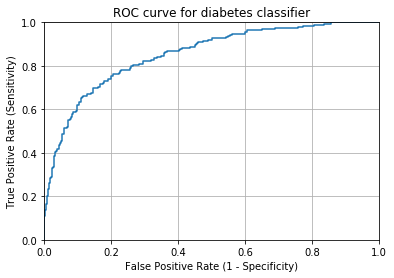

In [113]:
import sklearn
# IMPORTANT: first argument is true values, second argument is predicted probabilities
fpr, tpr, thresholds = sklearn.metrics.roc_curve(y_train['Attrition'], x_train['pred_prob'])
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)


In [114]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities
print(sklearn.metrics.roc_auc_score(y_train['Attrition'], x_train['y_pred_class_train']))
#Since AUC value is greater han 0.7, we can claim that our model is good

0.7754137115839244


# KS STATISTICS for Train data

In [115]:
#decile = pd.qcut(x_train['y_pred_class_train'], 10, labels=list(range(10,0,-1)))

In [116]:
def ks(data=None,target=None, prob=None):
    data['target0'] = 1 - data[target]
    data['bucket'] = pd.qcut(data[prob], 10)
    grouped = data.groupby('bucket', as_index = False)
    kstable = pd.DataFrame()
    kstable['min_prob'] = grouped.min()[prob]
    kstable['max_prob'] = grouped.max()[prob]
    kstable['events']   = grouped.sum()[target]
    kstable['nonevents'] = grouped.sum()['target0']
    kstable = kstable.sort_values(by="min_prob", ascending=False).reset_index(drop = True)
    kstable['event_rate'] = (kstable.events / data[target].sum()).apply('{0:.2%}'.format)
    kstable['nonevent_rate'] = (kstable.nonevents / data['target0'].sum()).apply('{0:.2%}'.format)
    kstable['cum_eventrate']=(kstable.events / data[target].sum()).cumsum()
    kstable['cum_noneventrate']=(kstable.nonevents / data['target0'].sum()).cumsum()
    kstable['KS'] = np.round(kstable['cum_eventrate']-kstable['cum_noneventrate'], 3) * 100

    #Formating
    kstable['cum_eventrate']= kstable['cum_eventrate'].apply('{0:.2%}'.format)
    kstable['cum_noneventrate']= kstable['cum_noneventrate'].apply('{0:.2%}'.format)
    kstable.index = range(1,11)
    kstable.index.rename('Decile', inplace=True)
    pd.set_option('display.max_columns', 9)
    print(kstable)
    
    #Display KS
    from colorama import Fore
    print(Fore.RED + "KS is " + str(max(kstable['KS']))+"%"+ " at decile " + str((kstable.index[kstable['KS']==max(kstable['KS'])][0])))
    return(kstable)

In [117]:
x_train['Attrition']=y_train['Attrition']

C:\Python\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [118]:
mydf = ks(data=x_train,target='Attrition', prob='pred_prob')
# there is no much variation in the decreasing order of Events 
#76.19% of the data is at decile 3.
# Hence we can claim that our model is good. 

C:\Python\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Python\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


        min_prob  max_prob  events  nonevents event_rate nonevent_rate  \
Decile                                                                   
1       0.439639  0.970221      79         39     41.80%         3.95%   
2       0.283659  0.434604      45         72     23.81%         7.29%   
3       0.174185  0.282360      20         98     10.58%         9.93%   
4       0.115475  0.172786      11        106      5.82%        10.74%   
5       0.079123  0.115447      12        106      6.35%        10.74%   
6       0.049404  0.079078       8        109      4.23%        11.04%   
7       0.033529  0.049348       7        111      3.70%        11.25%   
8       0.020456  0.033469       3        114      1.59%        11.55%   
9       0.010744  0.020400       4        114      2.12%        11.55%   
10      0.000484  0.010670       0        118      0.00%        11.96%   

       cum_eventrate cum_noneventrate    KS  
Decile                                       
1             41.80

# Validation forTest Data 

In [119]:
x_test['pred_prob']=result.predict(x_test)

C:\Python\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [120]:
x_test.head()

,DailyRate,DistanceFromHome,YearsWithCurrManager,BusinessTravel_Travel_Frequently,...,StockOptionLevel_1,StockOptionLevel_2,WorkLifeBalance_3,pred_prob
405,688,3,2,0,...,1,0,1,0.079568
272,1158,9,4,0,...,1,0,0,0.014859
1382,976,3,3,0,...,1,0,0,0.073079
898,920,3,7,0,...,1,0,1,0.013965
724,1206,17,2,0,...,0,1,1,0.010310


# 1. Confusion Matrix for Test Data

In [121]:
x_test['y_pred_class_test']=np.where(x_test['pred_prob']>=0.2,1,0)

C:\Python\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [122]:
HR_test=pd.crosstab(y_test['Attrition'],x_test['y_pred_class_test'])
print(HR_test)

y_pred_class_test    0   1
Attrition                 
0                  203  43
1                   16  32


In [123]:
# Sensitivity (Predicting Yes (1) as Yes)
33/(33+15)

0.6875

In [124]:
#Specificity (Predicting No(0) as No)
196/(196+50)

0.7967479674796748

In [125]:
#accuracy
(33+196)/(294)

0.7789115646258503

# 2. ROC Curve for Test Data


#ROC curve is ploting between Sensitivity and 1-Specificity

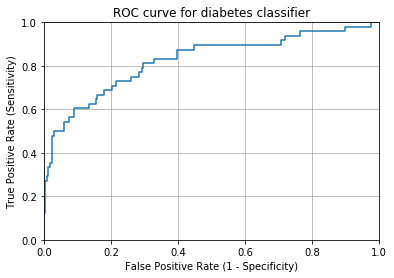

In [126]:
fpr, tpr, thresholds = sklearn.metrics.roc_curve(y_test['Attrition'], x_test['pred_prob'])
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)


In [127]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities
print(sklearn.metrics.roc_auc_score(y_test['Attrition'], x_test['y_pred_class_test']))

0.7459349593495934


# KS STATISTICS for Test Data

In [128]:
def ks(data=None,target=None, prob=None):
    data['target0'] = 1 - data[target]
    data['bucket'] = pd.qcut(data[prob], 10)
    grouped = data.groupby('bucket', as_index = False)
    kstable = pd.DataFrame()
    kstable['min_prob'] = grouped.min()[prob]
    kstable['max_prob'] = grouped.max()[prob]
    kstable['events']   = grouped.sum()[target]
    kstable['nonevents'] = grouped.sum()['target0']
    kstable = kstable.sort_values(by="min_prob", ascending=False).reset_index(drop = True)
    kstable['event_rate'] = (kstable.events / data[target].sum()).apply('{0:.2%}'.format)
    kstable['nonevent_rate'] = (kstable.nonevents / data['target0'].sum()).apply('{0:.2%}'.format)
    kstable['cum_eventrate']=(kstable.events / data[target].sum()).cumsum()
    kstable['cum_noneventrate']=(kstable.nonevents / data['target0'].sum()).cumsum()
    kstable['KS'] = np.round(kstable['cum_eventrate']-kstable['cum_noneventrate'], 3) * 100

    #Formating
    kstable['cum_eventrate']= kstable['cum_eventrate'].apply('{0:.2%}'.format)
    kstable['cum_noneventrate']= kstable['cum_noneventrate'].apply('{0:.2%}'.format)
    kstable.index = range(1,11)
    kstable.index.rename('Decile', inplace=True)
    pd.set_option('display.max_columns', 9)
    print(kstable)
    
    #Display KS
    from colorama import Fore
    print(Fore.RED + "KS is " + str(max(kstable['KS']))+"%"+ " at decile " + str((kstable.index[kstable['KS']==max(kstable['KS'])][0])))
    return(kstable)

In [129]:
x_test['Attrition']=y_test['Attrition']

C:\Python\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [130]:
mydf_test = ks(data=x_test,target='Attrition', prob='pred_prob')

        min_prob  max_prob  events  nonevents event_rate nonevent_rate  \
Decile                                                                   
1       0.424747  0.911242      23          7     47.92%         2.85%   
2       0.262449  0.419284       6         23     12.50%         9.35%   
3       0.178100  0.261014       6         23     12.50%         9.35%   
4       0.119532  0.177949       4         26      8.33%        10.57%   
5       0.069472  0.117820       3         26      6.25%        10.57%   
6       0.041387  0.068175       1         28      2.08%        11.38%   
7       0.026637  0.040543       0         30      0.00%        12.20%   
8       0.013223  0.025408       3         26      6.25%        10.57%   
9       0.007867  0.013073       0         29      0.00%        11.79%   
10      0.001167  0.007529       2         28      4.17%        11.38%   

       cum_eventrate cum_noneventrate    KS  
Decile                                       
1             47.92

C:\Python\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Python\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


# Model Improvisation

In [131]:
HR_Attrition.head(2)

,Attrition,Age,BusinessTravel,DailyRate,...,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,Travel_Rarely,1102,...,6,4,0,5
1,0,49,Travel_Frequently,279,...,10,7,1,7


In [199]:
HR_Attrition.drop(['Education','EmployeeCount','EmployeeNumber', 'Gender','HourlyRate','MonthlyRate','NumCompaniesWorked','Over18','PercentSalaryHike','PerformanceRating','RelationshipSatisfaction','StandardHours','YearsSinceLastPromotion'],axis=1,inplace=True)

In [200]:
HR_Attrition.Attrition.replace(('Yes', 'No'), (1, 0), inplace=True)

In [201]:
HR_Attrition.shape

(1470, 22)

In [202]:
y=HR_Attrition.iloc[:,:-21]
x=HR_Attrition.iloc[:,1:22]

In [203]:
x3 = pd.get_dummies(x) 
x3.shape

(1470, 41)

In [204]:
x3.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'EnvironmentSatisfaction',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsWithCurrManager', 'BusinessTravel_Non-Travel',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Human Resources', 'Department_Research & Development',
       'Department_Sales', 'EducationField_Human Resources',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'JobRole_Healthcare Representative',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobRole_Research Scientist',
       'JobRole_Sales Executive', 'JobRole_Sales

In [205]:
x3 = x3.drop(["BusinessTravel_Non-Travel"], axis=1)
x3 = x3.drop(["Department_Sales"], axis=1)
x3 = x3.drop(["EducationField_Medical"], axis=1)
x3 = x3.drop(["JobRole_Manager"], axis=1)
x3 = x3.drop(["MaritalStatus_Single"], axis=1)
x3 = x3.drop(["OverTime_No"], axis=1)

In [206]:
def vif_cal(input_data):
    x_vars=input_data
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.ols(formula="y~x", data=x_vars).fit().rsquared  
        vif=round(1/(1-rsq),2)
        print (xvar_names[i], " VIF = " , vif)

In [207]:
import statsmodels.formula.api as sm
#Calculating VIF values using that function
vif_cal(input_data=x3)
from statsmodels.stats.outliers_influence import variance_inflation_factor


Age  VIF =  2.0
DailyRate  VIF =  1.03
DistanceFromHome  VIF =  1.02
EnvironmentSatisfaction  VIF =  1.02
JobInvolvement  VIF =  1.03
JobLevel  VIF =  14.07
JobSatisfaction  VIF =  1.01
MonthlyIncome  VIF =  17.97
StockOptionLevel  VIF =  1.9
TotalWorkingYears  VIF =  4.77
TrainingTimesLastYear  VIF =  1.03
WorkLifeBalance  VIF =  1.03
YearsAtCompany  VIF =  4.23
YearsInCurrentRole  VIF =  2.73
YearsWithCurrManager  VIF =  2.84
BusinessTravel_Travel_Frequently  VIF =  2.36
BusinessTravel_Travel_Rarely  VIF =  2.36
Department_Human Resources  VIF =  8.49
Department_Research & Development  VIF =  15.89
EducationField_Human Resources  VIF =  1.8
EducationField_Life Sciences  VIF =  1.39
EducationField_Marketing  VIF =  1.66
EducationField_Other  VIF =  1.13
EducationField_Technical Degree  VIF =  1.2
JobRole_Healthcare Representative  VIF =  5.25
JobRole_Human Resources  VIF =  7.35
JobRole_Laboratory Technician  VIF =  12.22
JobRole_Manufacturing Director  VIF =  5.76
JobRole_Research Di

In [208]:
#Drop the variables if VIF>5
x3 = x3.drop(["JobLevel"], axis=1)
x3 = x3.drop(["MonthlyIncome"], axis=1)
x3 = x3.drop(["Department_Research & Development"], axis=1)
x3 = x3.drop(["JobRole_Laboratory Technician"], axis=1)
x3 = x3.drop(["JobRole_Research Scientist"], axis=1)
x3 = x3.drop(["JobRole_Sales Executive"], axis=1)
x3 = x3.drop(["JobRole_Sales Representative"], axis=1)
x3 = x3.drop(["JobRole_Manufacturing Director"], axis=1)
x3 = x3.drop(["JobRole_Healthcare Representative"], axis=1)
x3 = x3.drop(["Department_Human Resources"], axis=1)

In [209]:
##Spillting Train and Test Data Test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x3,y,test_size=0.2,random_state=11)

In [210]:
import statsmodels.api as sm
model=sm.Logit(y_train,x_train)
result=model.fit()

Optimization terminated successfully.
         Current function value: 0.330353
         Iterations 8


In [211]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Attrition   No. Observations:                 1176
Model:                          Logit   Df Residuals:                     1151
Method:                           MLE   Df Model:                           24
Date:                Thu, 28 May 2020   Pseudo R-squ.:                  0.2507
Time:                        14:38:17   Log-Likelihood:                -388.49
converged:                       True   LL-Null:                       -518.44
Covariance Type:            nonrobust   LLR p-value:                 1.790e-41
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Age                                  0.0029      0.012      0.243      0.808      -0.021       0.027
DailyRate                           -0.0002      0.000     -0.823      0.411      -0.001       0.000
DistanceFromHome                     0.0493      0.011      4.539      0.000       0.028       0.071
EnvironmentSatisfaction             -0.2723      0.085     -3.218      0.001      -0.438      -0.106
JobInvolvement                      -0.3849      0.121     -3.169      0.002      -0.623      -0.147
JobSatisfaction                     -0.2944      0.082     -3.591      0.000      -0.455      -0.134
StockOptionLevel                    -0.1125      0.165     -0.681      0.496      -0.436       0.211
TotalWorkingYears                   -0.0728      0.023     -3.158      0.002      -0.118      -0.028
TrainingTimesLastYear               -0.0734      0.075     -0.982      0.326      -0.220       0.073
WorkLifeBalance                     -0.1336      0.119     -1.123      0.262      -0.367       0.100
YearsAtCompany                       0.0645      0.036      1.770      0.077      -0.007       0.136
YearsInCurrentRole                  -0.0608      0.049     -1.248      0.212      -0.156       0.035
YearsWithCurrManager                -0.1006      0.050     -2.018      0.044      -0.198      -0.003
BusinessTravel_Travel_Frequently     2.2030      0.450      4.901      0.000       1.322       3.084
BusinessTravel_Travel_Rarely         1.3969      0.417      3.351      0.001       0.580       2.214
EducationField_Human Resources       1.3550      0.755      1.795      0.073      -0.124       2.834
EducationField_Life Sciences         0.2834      0.228      1.241      0.214      -0.164       0.731
EducationField_Marketing             0.7295      0.318      2.292      0.022       0.106       1.353
EducationField_Other                -0.0057      0.438     -0.013      0.990      -0.864       0.852
EducationField_Technical Degree      1.2140      0.319      3.809      0.000       0.589       1.839
JobRole_Human Resources              0.2058      0.564      0.365      0.715      -0.899       1.311
JobRole_Research Director           -1.3718      0.806     -1.702      0.089      -2.952       0.208
MaritalStatus_Divorced              -1.0320      0.361     -2.859      0.004      -1.740      -0.324
MaritalStatus_Married               -0.8295      0.265     -3.136      0.002      -1.348      -0.311
OverTime_Yes                         1.7125      0.193      8.892      0.000       1.335       2.090
====================================================================================================
"""

In [212]:
x3 = x3.drop(["Age"], axis=1)
x3 = x3.drop(["DailyRate"], axis=1)
x3 = x3.drop(["StockOptionLevel"], axis=1)
x3 = x3.drop(["EducationField_Human Resources"], axis=1)
x3 = x3.drop(["WorkLifeBalance"], axis=1)
x3 = x3.drop(["TrainingTimesLastYear"], axis=1)
x3 = x3.drop(["YearsAtCompany"], axis=1)
x3 = x3.drop(["YearsInCurrentRole"], axis=1)
x3 = x3.drop(["EducationField_Life Sciences"], axis=1)
x3 = x3.drop(["EducationField_Other"], axis=1)
x3 = x3.drop(["JobRole_Human Resources"], axis=1)
x3 = x3.drop(["JobRole_Research Director"], axis=1)

In [141]:
# p value for Age,DailyRate,JobLevel,MonthlyIncome,StockOptionLevel,TotalWorkingYears,YearsInCurrentRole,
#Department_Human Resources,Department_Research & Development,EducationField_Human Resources,
#EducationField_Life Sciences,EducationField_Marketing,EducationField_Other,JobRole_Healthcare Representative
#JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manufacturing Director,JobRole_Research Director
#JobRole_Research Scientist are >0.05 , so drop all that columns and rerun the model.


In [142]:
#x3 = x3.drop(["Age"], axis=1)
#x3 = x3.drop(["DailyRate"], axis=1)
#x3 = x3.drop(["JobLevel"], axis=1)
#x3 = x3.drop(["MonthlyIncome"], axis=1)
#x3 = x3.drop(["StockOptionLevel"], axis=1)
#x3 = x3.drop(["TotalWorkingYears"], axis=1)
#x3 = x3.drop(["YearsInCurrentRole"], axis=1)
#x3 = x3.drop(["Department_Human Resources"], axis=1)
#x3 = x3.drop(["Department_Research & Development"], axis=1)
#x3 = x3.drop(["EducationField_Human Resources"], axis=1)
#x3 = x3.drop(["EducationField_Life Sciences"], axis=1)
#x3 = x3.drop(["EducationField_Marketing"], axis=1)
#x3 = x3.drop(["EducationField_Other"], axis=1)
#x3 = x3.drop(["JobRole_Healthcare Representative"], axis=1)
#x3 = x3.drop(["JobRole_Human Resources"], axis=1)
#x3 = x3.drop(["JobRole_Laboratory Technician"], axis=1)
#x3 = x3.drop(["JobRole_Manufacturing Director"], axis=1)
#x3 = x3.drop(["JobRole_Research Director"], axis=1)
#x3 = x3.drop(["JobRole_Research Scientist"], axis=1)

In [213]:
##Spillting Train and Test Data Test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x3,y,test_size=0.2,random_state=11)

In [214]:
x_test.shape

(294, 13)

In [215]:
model=sm.Logit(y_train,x_train)
result=model.fit()

Optimization terminated successfully.
         Current function value: 0.338283
         Iterations 7


In [216]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Attrition   No. Observations:                 1176
Model:                          Logit   Df Residuals:                     1163
Method:                           MLE   Df Model:                           12
Date:                Thu, 28 May 2020   Pseudo R-squ.:                  0.2327
Time:                        14:41:31   Log-Likelihood:                -397.82
converged:                       True   LL-Null:                       -518.44
Covariance Type:            nonrobust   LLR p-value:                 9.142e-45
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
DistanceFromHome                     0.0474      0.011      4.477      0.000       0.027       0.068
EnvironmentSatisfaction             -0.2751      0.080     -3.459      0.001      -0.431      -0.119
JobInvolvement                      -0.4229      0.111     -3.809      0.000      -0.641      -0.205
JobSatisfaction                     -0.3046      0.078     -3.930      0.000      -0.456      -0.153
TotalWorkingYears                   -0.0691      0.016     -4.231      0.000      -0.101      -0.037
YearsWithCurrManager                -0.0731      0.033     -2.232      0.026      -0.137      -0.009
BusinessTravel_Travel_Frequently     1.9635      0.392      5.010      0.000       1.195       2.732
BusinessTravel_Travel_Rarely         1.1496      0.354      3.243      0.001       0.455       1.844
EducationField_Marketing             0.5269      0.281      1.874      0.061      -0.024       1.078
EducationField_Technical Degree      0.9522      0.282      3.378      0.001       0.400       1.505
MaritalStatus_Divorced              -1.1159      0.259     -4.312      0.000      -1.623      -0.609
MaritalStatus_Married               -0.9348      0.202     -4.618      0.000      -1.332      -0.538
OverTime_Yes                         1.6747      0.189      8.858      0.000       1.304       2.045
====================================================================================================
"""

In [147]:
#p value for TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany are>0.05,so drop that columns and rerun the model

In [217]:
x3 = x3.drop(["EducationField_Marketing"], axis=1)
#x3 = x3.drop(["TrainingTimesLastYear"], axis=1)
#x3 = x3.drop(["WorkLifeBalance"], axis=1)
#x3 = x3.drop(["YearsAtCompany"], axis=1)

In [218]:
##Spillting Train and Test Data Test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x3,y,test_size=0.2,random_state=11)

In [219]:
x_test.shape

(294, 12)

In [220]:
model=sm.Logit(y_train,x_train)
result=model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.339708
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Attrition   No. Observations:                 1176
Model:                          Logit   Df Residuals:                     1164
Method:                           MLE   Df Model:                           11
Date:                Thu, 28 May 2020   Pseudo R-squ.:                  0.2294
Time:                        14:42:15   Log-Likelihood:                -399.50
converged:                       True   LL-Null:                       -518.44
Covariance Type:            nonrobust   LLR p-value:                 9.533e-45
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
DistanceFromHome                     0.0478      0.011      4.534      0.000       0.027       0.069
EnvironmentSatisfaction             -0.2709      0.079     -3.419      0.001      -0.426      -0.116
JobInvolvement                      -0.4227      0.111     -3.816      0.000      -0.640      -0.206
JobSatisfaction                     -0.3053      0.077     -3.945      0.000      -0.457      -0.154
TotalWorkingYears                   -0.0683      0.016     -4.189      0.000      -0.100      -0.036
YearsWithCurrManager                -0.0741      0.033     -2.261      0.024      -0.138      -0.010
BusinessTravel_Travel_Frequently     1.9967      0.393      5.084      0.000       1.227       2.767
BusinessTravel_Travel_Rarely         1.2002      0.354      3.389      0.001       0.506       1.894
EducationField_Technical Degree      0.8872      0.279      3.181      0.001       0.341       1.434
MaritalStatus_Divorced              -1.1029      0.258     -4.275      0.000      -1.609      -0.597
MaritalStatus_Married               -0.9318      0.202     -4.614      0.000      -1.328      -0.536
OverTime_Yes                         1.6732      0.189      8.874      0.000       1.304       2.043
====================================================================================================
"""

In [221]:

# DistanceFromHome = 0.0427. As distance increases, then the chances are high that the employee may leave the company
# EnvironmentSatisfaction = -0.2915. then less chancess to leave the company.
# BusinessTravel_Travel_Frequently=1.6538, The peron who travels most frequently is having 1.65 chnaces of leaving the company.


In [222]:
x_train['pred_prob']=result.predict(x_train)

C:\Python\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [223]:
x_train.head()

,DistanceFromHome,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,...,MaritalStatus_Divorced,MaritalStatus_Married,OverTime_Yes,pred_prob
38,5,2,2,1,...,0,1,1,0.519683
907,5,2,3,2,...,0,1,0,0.011779
311,7,1,3,1,...,1,0,0,0.044360
77,6,4,3,1,...,0,1,1,0.169521
287,23,4,3,4,...,1,0,0,0.038936


# Validate Model

#1. Confusion Matrix for Train Data

In [224]:
# Train Data
# make class predictions for the testing set
x_train['y_pred_class_train_gp']=np.where(x_train['pred_prob']>=0.2,1,0)

C:\Python\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [225]:
x_train.head()

,DistanceFromHome,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,...,MaritalStatus_Married,OverTime_Yes,pred_prob,y_pred_class_train_gp
38,5,2,2,1,...,1,1,0.519683,1
907,5,2,3,2,...,1,0,0.011779,0
311,7,1,3,1,...,0,0,0.044360,0
77,6,4,3,1,...,1,1,0.169521,0
287,23,4,3,4,...,0,0,0.038936,0


In [226]:
ct=pd.crosstab(y_train['Attrition'],x_train['y_pred_class_train_gp'])
print(ct)

y_pred_class_train_gp    0    1
Attrition                      
0                      805  182
1                       63  126


In [227]:
# Sensitivity 
126/(126+63)
# we are correctly predicting 124, out of all the employees who will leave the company.

0.6666666666666666

In [228]:
#Specificity (Predicting bad (0) customer as Bad customer)
805/(805+182)
# we are correctly predicting 803, out of all the employees who will not leave the company.

0.8156028368794326

In [229]:
#accuracy
(126+805)/(1176)

0.7916666666666666

# 2. ROC Curve for Train Data

ROC curve is ploting between Sensitivity and 1-Specificity

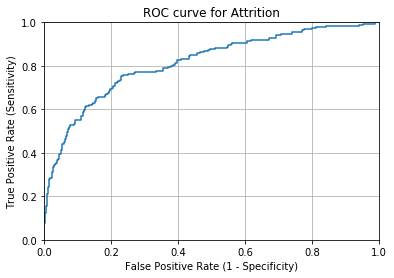

In [230]:
import sklearn
# IMPORTANT: first argument is true values, second argument is predicted probabilities
fpr, tpr, thresholds = sklearn.metrics.roc_curve(y_train['Attrition'], x_train['pred_prob'])
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Attrition')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [231]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities
print(sklearn.metrics.roc_auc_score(y_train['Attrition'], x_train['y_pred_class_train_gp']))

0.7411347517730495


# KS STATISTICS for Train Data

In [232]:
x_train['Attrition']=y_train['Attrition']

C:\Python\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [233]:
mydf = ks(data=x_train,target='Attrition', prob='pred_prob')

        min_prob  max_prob  events  nonevents event_rate nonevent_rate  \
Decile                                                                   
1       0.412670  0.925879      74         44     39.15%         4.46%   
2       0.263717  0.409281      41         76     21.69%         7.70%   
3       0.178589  0.263272      22         96     11.64%         9.73%   
4       0.129858  0.178443       9        108      4.76%        10.94%   
5       0.094199  0.129454      14        104      7.41%        10.54%   
6       0.068351  0.093813       7        110      3.70%        11.14%   
7       0.046931  0.068257       7        111      3.70%        11.25%   
8       0.031092  0.046751       7        110      3.70%        11.14%   
9       0.016768  0.030868       5        113      2.65%        11.45%   
10      0.000918  0.016695       3        115      1.59%        11.65%   

       cum_eventrate cum_noneventrate    KS  
Decile                                       
1             39.15

C:\Python\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Python\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


# Validate model in test dataset

In [234]:
x_test['pred_prob']=result.predict(x_test)

C:\Python\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


# Confusion Matrix for Test Data

In [235]:
x_test['y_pred_class_train_gp']=np.where(x_test['pred_prob']>=0.3,1,0)

C:\Python\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [236]:
ct=pd.crosstab(y_test['Attrition'],x_test['y_pred_class_train_gp'])
print(ct)

y_pred_class_train_gp    0   1
Attrition                     
0                      226  20
1                       22  26


In [237]:
# Sensitivity (Predicting good (1) customer as Good customer)
26/(26+22)

0.5416666666666666

In [240]:
#Specificity (Predicting bad (0) customer as Bad customer)
226/(226+26)

0.8968253968253969

In [241]:
#accuracy
(226+26)/(294)

0.8571428571428571

# 2. ROC Curve for Test Data

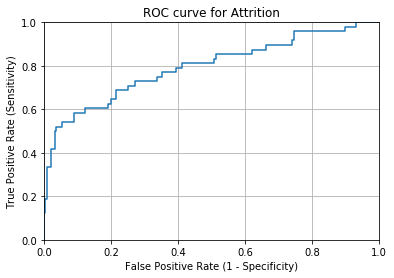

In [242]:
import sklearn
# IMPORTANT: first argument is true values, second argument is predicted probabilities
fpr, tpr, thresholds = sklearn.metrics.roc_curve(y_test['Attrition'], x_test['pred_prob'])
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Attrition')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)


In [243]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities
print(sklearn.metrics.roc_auc_score(y_test['Attrition'], x_test['y_pred_class_train_gp']))

0.7301829268292682


# KS STATISTICS for Test Data

In [238]:
x_test['Attrition']=y_test['Attrition']

C:\Python\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [239]:
mydf = ks(data=x_test,target='Attrition', prob='pred_prob')

        min_prob  max_prob  events  nonevents event_rate nonevent_rate  \
Decile                                                                   
1       0.421178  0.876945      22          8     45.83%         3.25%   
2       0.270602  0.414634       7         22     14.58%         8.94%   
3       0.175472  0.269929       4         25      8.33%        10.16%   
4       0.132770  0.174801       2         28      4.17%        11.38%   
5       0.086898  0.124702       4         25      8.33%        10.16%   
6       0.067071  0.086849       2         27      4.17%        10.98%   
7       0.043037  0.065688       2         28      4.17%        11.38%   
8       0.028983  0.041713       3         26      6.25%        10.57%   
9       0.013781  0.027437       0         29      0.00%        11.79%   
10      0.001638  0.013745       2         28      4.17%        11.38%   

       cum_eventrate cum_noneventrate    KS  
Decile                                       
1             45.83

C:\Python\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Python\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
